<a href="https://colab.research.google.com/github/MohammadRaziei/Deep-Learning-Course/blob/master/HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW02

Please check last updates and get the latest version from following link. it is more completed but it may have some updates after release it.

[<img src="https://img.icons8.com/clouds/50/000000/github.png"/>](https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/)  
github link : https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/HW02.ipynb

### Problem 1

train.shape:  (60000, 28, 28)   ,test.shape:  (10000, 28, 28)


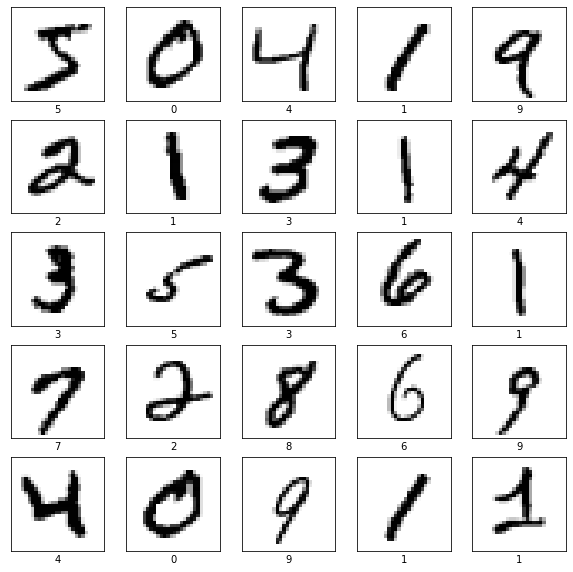

In [ ]:

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(37) #dont change this line



(x_train_val, y_train_val), (x_test, y_test) = mnist.load_data()
print('train.shape: ', x_train_val.shape, '  ,test.shape: ', x_test.shape)


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_val[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train_val[i]))
plt.show()

Preprossesing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# X_train, y_train,  x_valid, y_valid = train_test_split(x_train_val, y_train_val, test_size = 0.2) 
val_size = int(0.2*x_train_val.shape[0])
x_train, y_train,  x_valid, y_valid = x_train_val[:val_size], y_train_val[:val_size], x_train_val[val_size:], y_train_val[val_size:]
# del x_train_val, y_train_val

onehotencoder = OneHotEncoder()
y_train_onehot = onehotencoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_valid_onehot = onehotencoder.transform(y_valid.reshape(-1, 1)).toarray()
y_test_onehot = onehotencoder.transform(y_test.reshape(-1, 1)).toarray()

y_train_onehot2 = 0.3+0.4*y_train_onehot
y_valid_onehot2 = 0.3+0.4*y_valid_onehot
y_test_onehot2  = 0.3+0.4*y_test_onehot 

# sc = StandardScaler()
# xn_train = sc.fit_transform(x_train)
# xn_test = sc.transform(x_test)
xn_train, xn_valid, xn_test = (x_train/256. ,x_valid/256. ,x_test/256.) 



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError
#%% for CCE
model = Sequential([
    Flatten(input_shape=(28, 28)),
    # Dense(784, activation='relu'),
    Dense(60, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', 
              loss=CategoricalCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(xn_train, 
                    y_train_onehot,
                    batch_size=64,
                    epochs=10,
                    validation_data=(xn_valid, y_valid_onehot)
                    )

Epoch 1/10
188/188 [==============================] - 1s 7ms/step - loss: 0.6801 - accuracy: 0.8252 - val_loss: 0.3878 - val_accuracy: 0.8902
Epoch 2/10
188/188 [==============================] - 1s 6ms/step - loss: 0.3021 - accuracy: 0.9153 - val_loss: 0.3143 - val_accuracy: 0.9107
Epoch 3/10
188/188 [==============================] - 1s 6ms/step - loss: 0.2424 - accuracy: 0.9327 - val_loss: 0.2790 - val_accuracy: 0.9186
Epoch 4/10
188/188 [==============================] - 1s 6ms/step - loss: 0.2035 - accuracy: 0.9432 - val_loss: 0.2545 - val_accuracy: 0.9275
Epoch 5/10
188/188 [==============================] - 1s 6ms/step - loss: 0.1747 - accuracy: 0.9515 - val_loss: 0.2393 - val_accuracy: 0.9306
Epoch 6/10
188/188 [==============================] - 1s 6ms/step - loss: 0.1526 - accuracy: 0.9610 - val_loss: 0.2209 - val_accuracy: 0.9356
Epoch 7/10
188/188 [==============================] - 1s 6ms/step - loss: 0.1327 - accuracy: 0.9655 - val_loss: 0.2103 - val_accuracy: 0.9388
Epoch 

test

In [ ]:
test_loss, test_acc = model.evaluate(xn_test, y_test_onehot, verbose=2)
print('\nTest accuracy:', test_acc*100)


313/313 - 0s - loss: 0.1878 - accuracy: 0.9461

Test accuracy: 94.60999965667725


another impl

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError
#%% for BCE
model = Sequential([
    Flatten(input_shape=(28, 28)),
    # Dense(784, activation='relu'),
    Dense(60, activation='relu'),
    Dense(10, activation='sigmoid')
])


model.compile(optimizer='adam', 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(xn_train, 
                    y_train_onehot2,
                    batch_size=64,
                    epochs=10,
                    validation_data=(xn_valid, y_valid_onehot2)
                    )

Epoch 1/10
188/188 [==============================] - 1s 7ms/step - loss: 0.6323 - accuracy: 0.7318 - val_loss: 0.6249 - val_accuracy: 0.8589
Epoch 2/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6224 - accuracy: 0.8932 - val_loss: 0.6216 - val_accuracy: 0.8932
Epoch 3/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6198 - accuracy: 0.9195 - val_loss: 0.6200 - val_accuracy: 0.9118
Epoch 4/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6185 - accuracy: 0.9323 - val_loss: 0.6189 - val_accuracy: 0.9187
Epoch 5/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6175 - accuracy: 0.9424 - val_loss: 0.6182 - val_accuracy: 0.9256
Epoch 6/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6169 - accuracy: 0.9467 - val_loss: 0.6177 - val_accuracy: 0.9296
Epoch 7/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6164 - accuracy: 0.9513 - val_loss: 0.6174 - val_accuracy: 0.9305
Epoch 

test

In [ ]:
test_loss, test_acc = model.evaluate(xn_test, y_test_onehot2, verbose=2)
print('\nTest accuracy:', test_acc*100)



313/313 - 0s - loss: 0.6166 - accuracy: 0.9362

Test accuracy: 93.62000226974487


### Problem 2

Dropout(.2)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError
#%% for CCE
model = Sequential([
    Flatten(input_shape=(28, 28)),
    # Dense(784, activation='relu'),
    Dense(60, activation='relu'),
    Dropout(.2),
    Dense(10, activation='sigmoid')
])


model.compile(optimizer='adam', 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(xn_train, 
                    y_train_onehot2,
                    batch_size=64,
                    epochs=20,
                    validation_data=(xn_valid, y_valid_onehot2)
                   )

Epoch 1/20
188/188 [==============================] - 1s 7ms/step - loss: 0.6357 - accuracy: 0.6703 - val_loss: 0.6244 - val_accuracy: 0.8627
Epoch 2/20
188/188 [==============================] - 1s 6ms/step - loss: 0.6253 - accuracy: 0.8563 - val_loss: 0.6210 - val_accuracy: 0.8871
Epoch 3/20
188/188 [==============================] - 1s 6ms/step - loss: 0.6226 - accuracy: 0.8812 - val_loss: 0.6195 - val_accuracy: 0.9015
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 0.6211 - accuracy: 0.8941 - val_loss: 0.6188 - val_accuracy: 0.9078
Epoch 5/20
188/188 [==============================] - 1s 6ms/step - loss: 0.6203 - accuracy: 0.9027 - val_loss: 0.6182 - val_accuracy: 0.9133
Epoch 6/20
188/188 [==============================] - 1s 6ms/step - loss: 0.6198 - accuracy: 0.9072 - val_loss: 0.6180 - val_accuracy: 0.9184
Epoch 7/20
188/188 [==============================] - 1s 6ms/step - loss: 0.6192 - accuracy: 0.9166 - val_loss: 0.6177 - val_accuracy: 0.9200
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(xn_test, y_test_onehot2, verbose=2)
print('\nTest accuracy:', test_acc*100)

313/313 - 0s - loss: 0.6159 - accuracy: 0.9399

Test accuracy: 93.98999810218811


Dropout(.6)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError
#%% for BCE
model = Sequential([
    Flatten(input_shape=(28, 28)),
    # Dense(784, activation='relu'),
    Dense(60, activation='relu'),
    Dropout(.6),
    Dense(10, activation='sigmoid')
])


model.compile(optimizer='adam', 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(xn_train, 
                    y_train_onehot2,
                    batch_size=64,
                    epochs=10,
                    validation_data=(xn_valid, y_valid_onehot2)
                   )

Epoch 1/10
188/188 [==============================] - 1s 7ms/step - loss: 0.6479 - accuracy: 0.4210 - val_loss: 0.6283 - val_accuracy: 0.8237
Epoch 2/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6350 - accuracy: 0.6492 - val_loss: 0.6247 - val_accuracy: 0.8583
Epoch 3/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6309 - accuracy: 0.7153 - val_loss: 0.6228 - val_accuracy: 0.8842
Epoch 4/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6285 - accuracy: 0.7389 - val_loss: 0.6218 - val_accuracy: 0.8886
Epoch 5/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6268 - accuracy: 0.7596 - val_loss: 0.6205 - val_accuracy: 0.9009
Epoch 6/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6256 - accuracy: 0.7801 - val_loss: 0.6202 - val_accuracy: 0.9019
Epoch 7/10
188/188 [==============================] - 1s 6ms/step - loss: 0.6246 - accuracy: 0.7969 - val_loss: 0.6197 - val_accuracy: 0.9029
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(xn_test, y_test_onehot2, verbose=2)
print('\nTest accuracy:', test_acc*100)

313/313 - 0s - loss: 0.6185 - accuracy: 0.9153

Test accuracy: 91.53000116348267


it seems Dropout(0.6)

### Problem 3

### Problem 4

In [ ]:
from tensorflow.keras.utils import to_categorical
def prepareData(x,y):
    x1 = x.reshape((*x.shape,1))
    y1 = to_categorical(y)
    return x1, y1

trainX, trainY = prepareData(xn_train, y_train)
validX, validY = prepareData(xn_valid, y_valid)
testX, testY = prepareData(xn_test, y_test)
print(trainX.shape,
trainY.shape,
validX.shape,
validY.shape,
testX.shape,
testY.shape, sep='\n')

(12000, 28, 28, 1)
(12000, 10)
(48000, 28, 28, 1)
(48000, 10)
(10000, 28, 28, 1)
(10000, 10)


##### Create model without batch normalization:

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Conv1D, Conv2D, Conv3D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D, MaxPooling2D, Activation

from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError

model = Sequential([
    InputLayer((28,28,1)),

    # Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    # Activation('relu'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    # Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    # Activation('relu'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    Conv2D(filters=16, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    Conv2D(filters=1, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    # Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid'),
    #   Activation('relu'),
    #   Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same'),
    #   Activation('relu'),
    # Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'),
    # Activation('relu'),
    # Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
    # Activation('relu'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    # Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    # Activation('relu'),
    # MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
], name="CNN-P4")


model.compile(optimizer='adam', 
              loss=CategoricalCrossentropy(), 
              metrics=['accuracy'])

model.summary()

Model: "CNN-P4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 8, 8, 32)          18464     
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 8, 8, 1)           33        
_________________________________________________________________
flatten_45 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                4160 

fit and evaluate

In [ ]:
history = model.fit(trainX, 
                    trainY,
                    batch_size=64,
                    epochs=20,
                    validation_data=(validX, validY)
                   )
test_loss, test_acc = model.evaluate(testX, testY, verbose=2)
print('\nTest accuracy:', test_acc*100)

Epoch 1/20
188/188 [==============================] - 21s 112ms/step - loss: 0.7667 - accuracy: 0.7503 - val_loss: 0.3373 - val_accuracy: 0.8970
Epoch 2/20
188/188 [==============================] - 20s 109ms/step - loss: 0.2636 - accuracy: 0.9218 - val_loss: 0.2764 - val_accuracy: 0.9139
Epoch 3/20
188/188 [==============================] - 20s 108ms/step - loss: 0.1836 - accuracy: 0.9434 - val_loss: 0.2163 - val_accuracy: 0.9349
Epoch 4/20
188/188 [==============================] - 21s 111ms/step - loss: 0.1567 - accuracy: 0.9510 - val_loss: 0.2051 - val_accuracy: 0.9385
Epoch 5/20
188/188 [==============================] - 20s 107ms/step - loss: 0.1275 - accuracy: 0.9603 - val_loss: 0.1859 - val_accuracy: 0.9428
Epoch 6/20
188/188 [==============================] - 20s 107ms/step - loss: 0.1094 - accuracy: 0.9669 - val_loss: 0.1550 - val_accuracy: 0.9530
Epoch 7/20
188/188 [==============================] - 20s 108ms/step - loss: 0.0966 - accuracy: 0.9684 - val_loss: 0.1498 - val_ac

##### Create model with batch normalization:

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Dropout, Conv2D, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError

model = Sequential([
    InputLayer((28,28,1)),
    BatchNormalization(),
    Conv2D(filters=16, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=1, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    BatchNormalization(),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
], name="CNN-BN-P4")


model.compile(optimizer='adam', 
              loss=CategoricalCrossentropy(), 
              metrics=['accuracy'])

model.summary()

Model: "CNN-BN-P4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 32)          18464     
_________________________________________________________________
batch_normalization_14 (Batc (None, 8, 8, 32)          12

In [ ]:
history = model.fit(trainX, 
                    trainY,
                    batch_size=64,
                    epochs=20,
                    validation_data=(validX, validY)
                   )
test_loss, test_acc = model.evaluate(testX, testY, verbose=2)
print('\nTest accuracy:', test_acc*100)

Epoch 1/20
188/188 [==============================] - 15s 79ms/step - loss: 0.3407 - accuracy: 0.9015 - val_loss: 0.2595 - val_accuracy: 0.9400
Epoch 2/20
188/188 [==============================] - 15s 78ms/step - loss: 0.1143 - accuracy: 0.9665 - val_loss: 0.1561 - val_accuracy: 0.9555
Epoch 3/20
188/188 [==============================] - 15s 78ms/step - loss: 0.0642 - accuracy: 0.9814 - val_loss: 0.1338 - val_accuracy: 0.9615
Epoch 4/20
188/188 [==============================] - 15s 78ms/step - loss: 0.0332 - accuracy: 0.9911 - val_loss: 0.1535 - val_accuracy: 0.9583
Epoch 5/20
188/188 [==============================] - 15s 79ms/step - loss: 0.0205 - accuracy: 0.9943 - val_loss: 0.1516 - val_accuracy: 0.9619
Epoch 6/20
188/188 [==============================] - 15s 78ms/step - loss: 0.0173 - accuracy: 0.9959 - val_loss: 0.1598 - val_accuracy: 0.9626
Epoch 7/20
188/188 [==============================] - 15s 78ms/step - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.1686 - val_accuracy:

### Problem 6


with batch normalization we have more parameters(46867 params for Conv_BN and 46603 for Conv) and it is more accurate(97.08 for Conv_BN and 96.44 for Conv)


I think for larger scaled inputs, second arch is better choice becuase it perevent gradient flow effect.

### Problem 7


In [3]:
!git clone https://github.com/MohammadRaziei/imagenet-sample-images.git

Cloning into 'imagenet-sample-images'...
remote: Enumerating objects: 1002, done.
remote: Total 1002 (delta 0), reused 0 (delta 0), pack-reused 1002
Receiving objects: 100% (1002/1002), 103.78 MiB | 20.25 MiB/s, done.


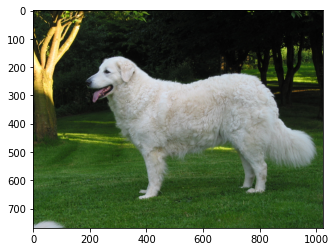

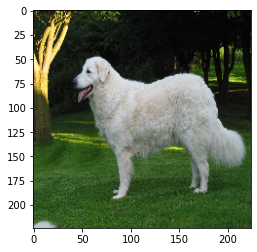

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
    
image_raw = mpimg.imread('imagenet-sample-images/n02104029_kuvasz.JPEG')
plt.imshow(image_raw)
plt.show()
image = cv2.resize(image_raw, (224,224), interpolation=cv2.INTER_CUBIC)
plt.imshow(image)
plt.show()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

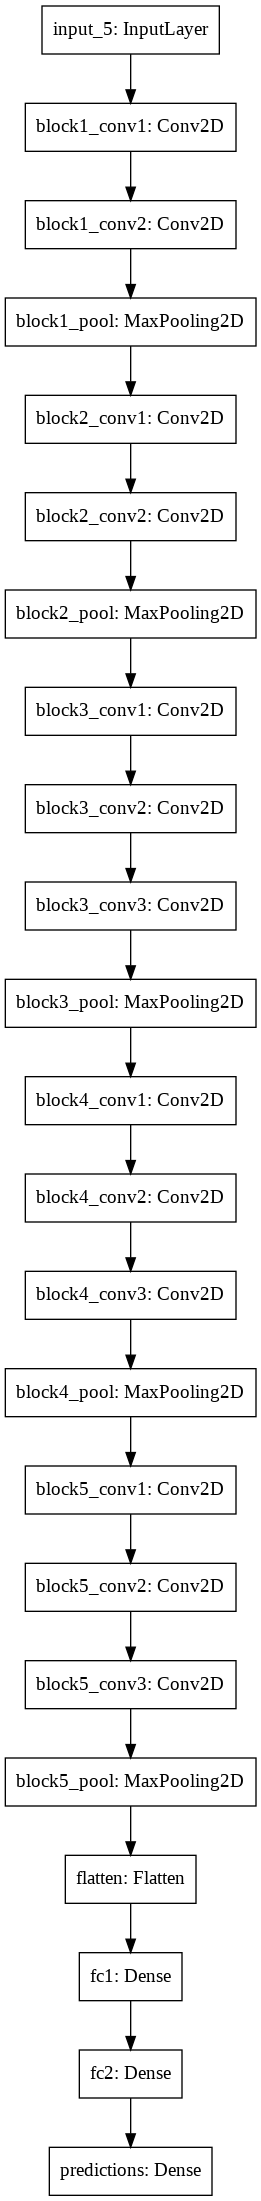

In [16]:
from tensorflow.keras.applications import VGG16
from keras.utils.vis_utils import plot_model

model_vgg16 = VGG16(weights='imagenet')
model_vgg16.summary()

plot_model(model_vgg16, to_file='vgg.png')

In [28]:
!pip install wget
import wget
image_url = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Coffee-Mug.jpg'
wget.download(image_url, out='mug.jpg')


'mug.jpg'

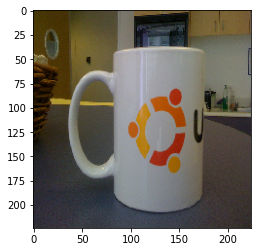

In [36]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# load an image from file
# image_file = 'imagenet-sample-images/n02104029_kuvasz.JPEG'
image_file = 'mug.jpg'
image = load_img(image_file, target_size=(224, 224))


plt.imshow(image)
plt.show()

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, *image.shape))
                       
# prepare the image for the VGG model
image = preprocess_input(image)


In [40]:
# predict the probability across all output classes
yhat = model_vgg16.predict(image)
yhat.shape

(1, 1000)

In [41]:

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


40960/35363 [==================================] - 0s 0us/step
coffee_mug (75.27%)


create a function

In [71]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

def vgg16_predict_image_label(filename):
    # load an image from file
    image = load_img(filename, target_size=(224, 224))
    plt.imshow(image)
    plt.grid(False) 
    plt.axis('off')   
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, *image.shape))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    plt.title('%s (%.2f%%)' % (label[1], label[2]*100) )



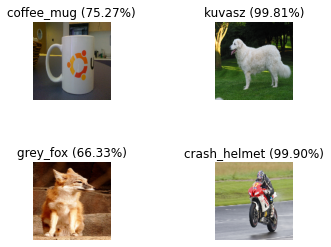

In [73]:
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
vgg16_predict_image_label('mug.jpg')
plt.subplot(2,2,2)
vgg16_predict_image_label('imagenet-sample-images/n02104029_kuvasz.JPEG')
plt.subplot(2,2,3)
vgg16_predict_image_label('imagenet-sample-images/n02119789_kit_fox.JPEG')
plt.subplot(2,2,4)
vgg16_predict_image_label('imagenet-sample-images/n03127747_crash_helmet.JPEG')

plt.show()


#### Visualize layers

In [79]:
# summarize filters in each convolutional layer
from matplotlib import pyplot
model_vgg16.summary()

print('='*65)
# summarize filter shapes
for layer in model_vgg16.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, "- filter:", filters.shape, " bias:", biases.shape)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

##### Visulize filters in second layer:

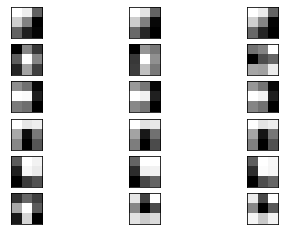

In [80]:
# cannot easily visualize filters lower down
from matplotlib import pyplot
# load the model
# retrieve weights from the second hidden layer
filters, biases = model_vgg16.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

##### Visualize out put of second layer given a image

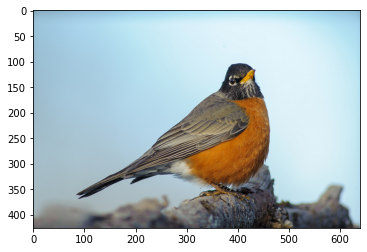

In [83]:
!pip install wget
import wget
image_url = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/bird.jpg'
wget.download(image_url, out='bird.jpg')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('bird.jpg')
plt.imshow(image)
plt.show()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


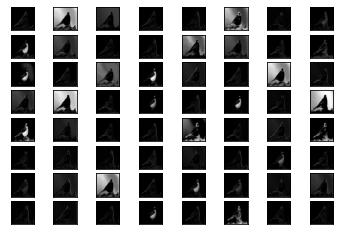

In [86]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
import numpy as np
# load the model
model = VGG16(weights='imagenet')
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()